In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import joblib


In [49]:
# Replace with your actual filename
df = pd.read_csv(r'C:\Users\chauh\Downloads\human voice clustering\vocal_gender_features_new.csv')

# Display first few rows
df.head()


,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
0,2247.331739,1158.537748,1870.415462,370.405241,21.440710,0.036879,4419.438073,0.169241,0.082552,1592.1033,...,21.736240,2.303085,8.983318,-17.410305,9.115154,0.301804,10.452693,-3.080832,10.146248,0
1,1790.719889,996.554825,1757.898617,410.710318,21.513383,0.018936,3635.742188,0.108068,0.055477,1112.6351,...,13.937135,-0.953942,10.831742,-0.088775,10.297690,-7.281142,10.926579,-0.450248,8.489134,0
2,1977.923363,1010.148667,1747.099555,461.458379,20.476283,0.032616,3873.291016,0.144633,0.060388,1557.5225,...,14.900779,0.260098,14.031009,-0.420670,10.810292,-0.199829,11.986182,3.372986,9.285437,0
3,2037.765550,1311.440630,1745.224852,419.056484,19.516014,0.028482,3826.584507,0.148933,0.029559,1481.0868,...,15.957924,-1.486122,14.461978,-8.479608,12.550333,3.997028,9.912608,-6.946966,10.574301,0
4,1739.383829,1092.623322,1623.135563,450.088465,20.260620,0.025737,3452.903892,0.117961,0.069078,1424.5352,...,15.105562,-3.366364,13.943447,-6.561539,11.944948,1.410639,13.110976,-3.252258,9.866687,0


In [50]:
print("✅ Dataset Info:")
print(df.info())

print("\n📈 Statistical Summary:")
print(df.describe())

print("\n🎯 Columns:")
print(df.columns)


✅ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16148 entries, 0 to 16147
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_spectral_centroid   16148 non-null  float64
 1   std_spectral_centroid    16148 non-null  float64
 2   mean_spectral_bandwidth  16148 non-null  float64
 3   std_spectral_bandwidth   16148 non-null  float64
 4   mean_spectral_contrast   16148 non-null  float64
 5   mean_spectral_flatness   16148 non-null  float64
 6   mean_spectral_rolloff    16148 non-null  float64
 7   zero_crossing_rate       16148 non-null  float64
 8   rms_energy               16148 non-null  float64
 9   mean_pitch               16148 non-null  float64
 10  min_pitch                16148 non-null  float64
 11  max_pitch                16148 non-null  float64
 12  std_pitch                16148 non-null  float64
 13  spectral_skew            16148 non-null  float64
 14  spectr

In [51]:
# Check for null values
print("Missing values:\n", df.isnull().sum())

# Handle missing values (fill with mean)
df.fillna(df.mean(), inplace=True)

# Drop duplicates if any
df.drop_duplicates(inplace=True)


Missing values:
 mean_spectral_centroid     0
std_spectral_centroid      0
mean_spectral_bandwidth    0
std_spectral_bandwidth     0
mean_spectral_contrast     0
mean_spectral_flatness     0
mean_spectral_rolloff      0
zero_crossing_rate         0
rms_energy                 0
mean_pitch                 0
min_pitch                  0
max_pitch                  0
std_pitch                  0
spectral_skew              0
spectral_kurtosis          0
energy_entropy             0
log_energy                 0
mfcc_1_mean                0
mfcc_1_std                 0
mfcc_2_mean                0
mfcc_2_std                 0
mfcc_3_mean                0
mfcc_3_std                 0
mfcc_4_mean                0
mfcc_4_std                 0
mfcc_5_mean                0
mfcc_5_std                 0
mfcc_6_mean                0
mfcc_6_std                 0
mfcc_7_mean                0
mfcc_7_std                 0
mfcc_8_mean                0
mfcc_8_std                 0
mfcc_9_mean               

In [52]:
# Ensure only numeric columns are selected
df = df.select_dtypes(include=['float64', 'int64'])

# Separate features and label
X = df.drop('label', axis=1)
y = df['label']


In [53]:
feature_columns = X.columns.tolist()

# Save this list for later
import joblib
joblib.dump(feature_columns, 'feature_columns.pkl')


['feature_columns.pkl']

In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler for Streamlit app
joblib.dump(scaler, 'scaler.pkl')

# Convert scaled features to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [56]:
df_scaled = X_scaled.copy()
df_scaled['label'] = y.values  # Ensure proper shape


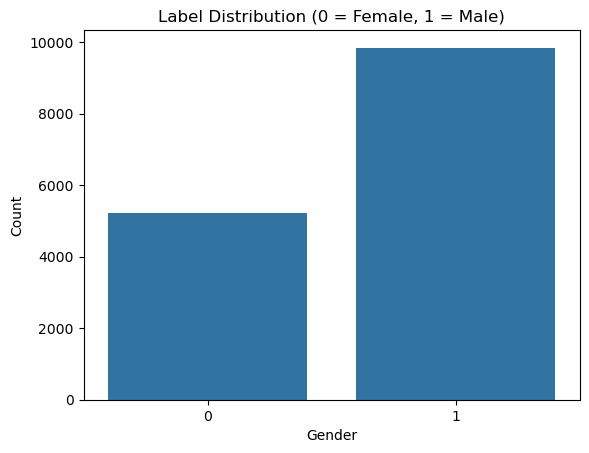

In [57]:
sns.countplot(data=df_scaled, x='label')
plt.title("Label Distribution (0 = Female, 1 = Male)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


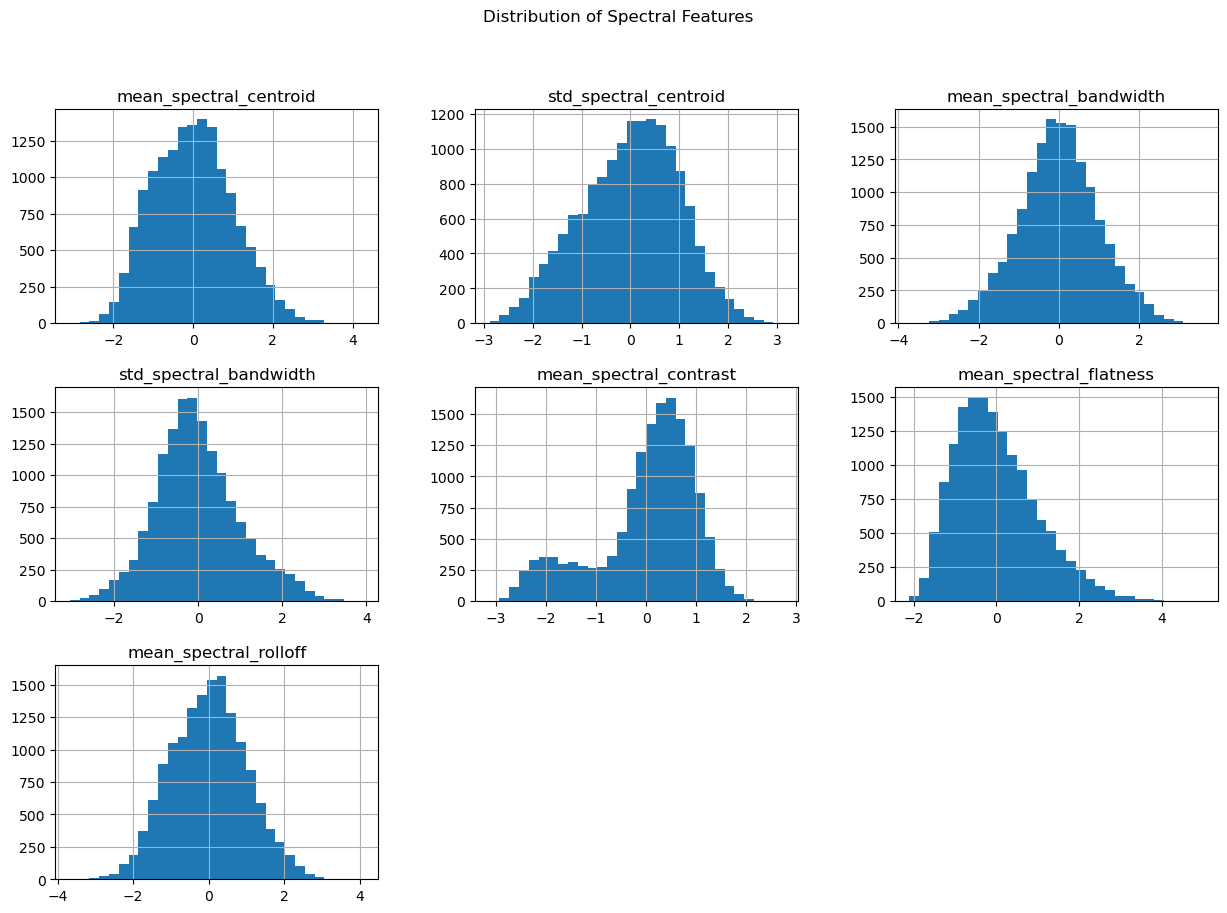

In [58]:
spectral_features = [
    'mean_spectral_centroid', 'std_spectral_centroid',
    'mean_spectral_bandwidth', 'std_spectral_bandwidth',
    'mean_spectral_contrast', 'mean_spectral_flatness',
    'mean_spectral_rolloff'
]

df_scaled[spectral_features].hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Distribution of Spectral Features")
plt.show()


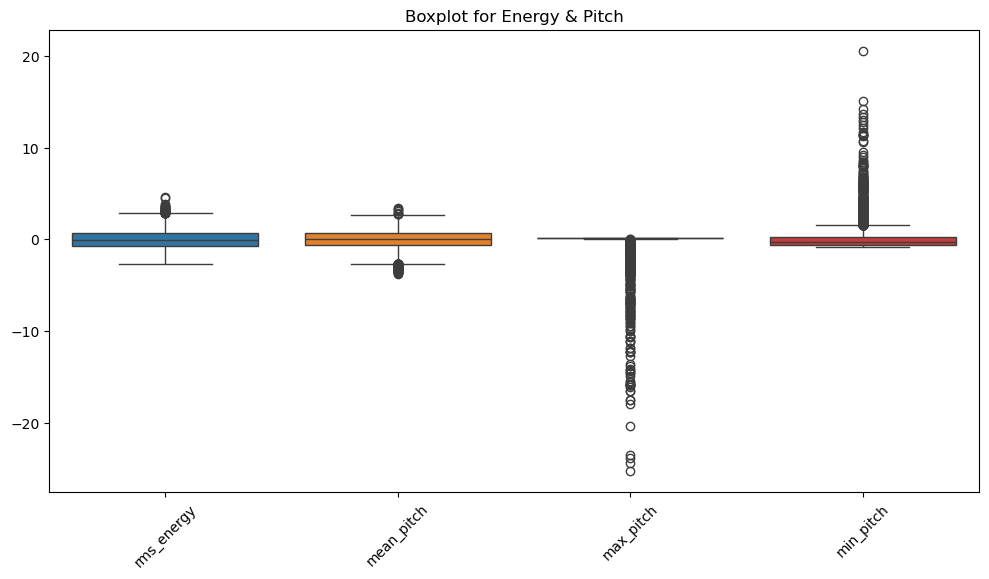

In [59]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled[['rms_energy', 'mean_pitch', 'max_pitch', 'min_pitch']])
plt.title("Boxplot for Energy & Pitch")
plt.xticks(rotation=45)
plt.show()


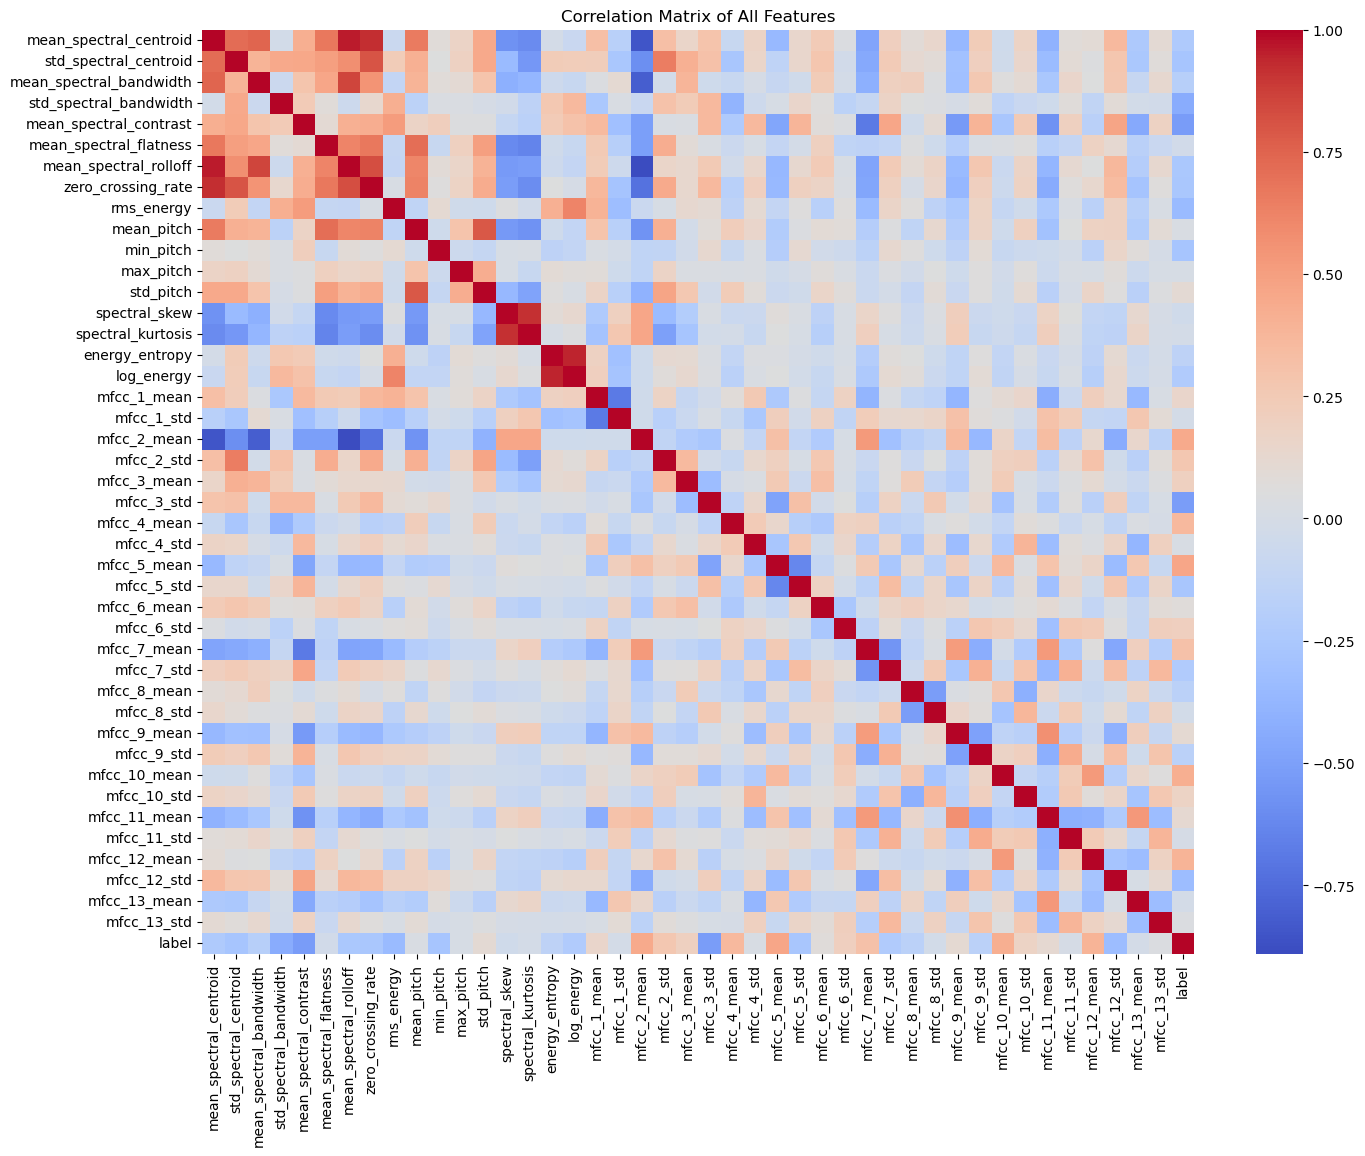

In [60]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_scaled.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix of All Features")
plt.show()


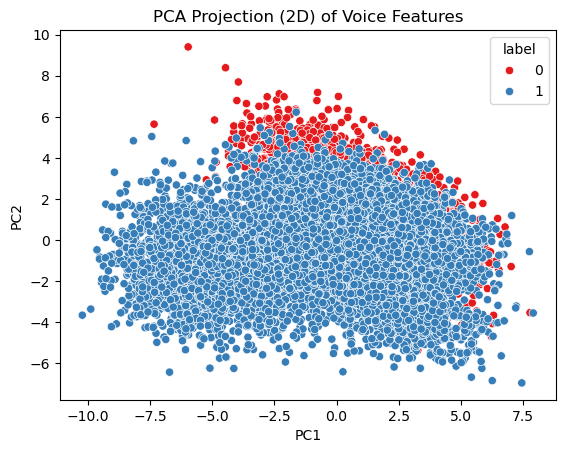

In [61]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = y.values

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='label', palette='Set1')
plt.title("PCA Projection (2D) of Voice Features")
plt.show()


In [62]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [63]:
# Apply KMeans with 2 clusters (since we expect male/female groups)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add to DataFrame for visualization
df_kmeans = X_scaled.copy()
df_kmeans['cluster'] = kmeans_labels

# Evaluate
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"🔹 KMeans Silhouette Score: {kmeans_silhouette:.4f}")


🔹 KMeans Silhouette Score: 0.1745


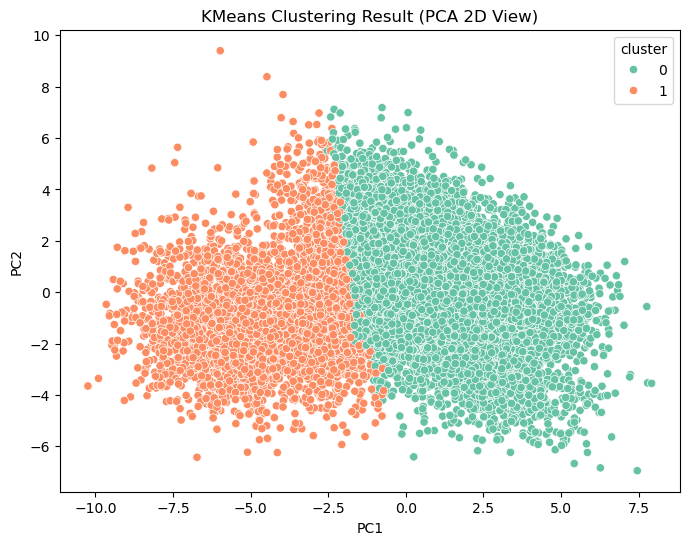

In [64]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['cluster'] = kmeans_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='Set2')
plt.title("KMeans Clustering Result (PCA 2D View)")
plt.show()


In [65]:
# Apply DBSCAN (eps and min_samples might need tuning)
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add to DataFrame for visualization
df_dbscan = X_scaled.copy()
df_dbscan['cluster'] = dbscan_labels

# Evaluate (exclude noise: -1)
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
    print(f"🔹 DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")
else:
    print("⚠️ DBSCAN produced only one cluster or noise. Adjust eps/min_samples.")


🔹 DBSCAN Silhouette Score: 0.0021


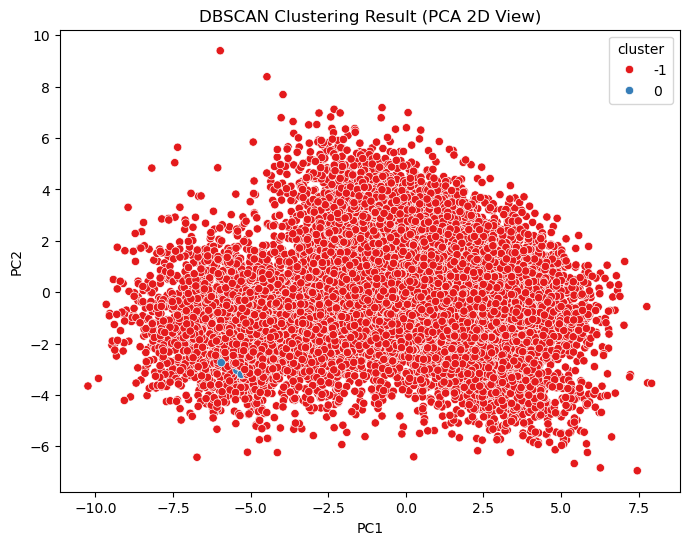

In [66]:
pca_df['cluster'] = dbscan_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='Set1')
plt.title("DBSCAN Clustering Result (PCA 2D View)")
plt.show()


In [67]:
df_kmeans['true_label'] = y.values
df_kmeans.to_csv('voice_kmeans_output.csv', index=False)


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


In [69]:
# Train
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("🎯 Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("✅ Accuracy:", accuracy_score(y_test, y_pred_rf))


🎯 Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1046
           1       0.99      1.00      1.00      1968

    accuracy                           0.99      3014
   macro avg       0.99      0.99      0.99      3014
weighted avg       0.99      0.99      0.99      3014

✅ Accuracy: 0.9936960849369608


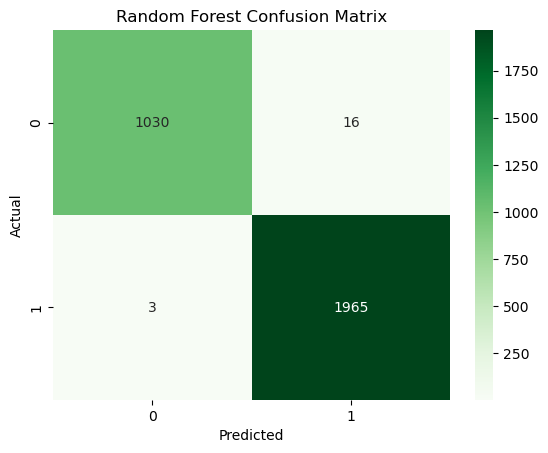

In [70]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [71]:
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("🎯 SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("✅ Accuracy:", accuracy_score(y_test, y_pred_svm))


🎯 SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1046
           1       1.00      1.00      1.00      1968

    accuracy                           1.00      3014
   macro avg       1.00      1.00      1.00      3014
weighted avg       1.00      1.00      1.00      3014

✅ Accuracy: 0.9993364299933643


In [72]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

print("🎯 MLP Neural Network Report:\n", classification_report(y_test, y_pred_mlp))
print("✅ Accuracy:", accuracy_score(y_test, y_pred_mlp))


🎯 MLP Neural Network Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1046
           1       1.00      1.00      1.00      1968

    accuracy                           1.00      3014
   macro avg       1.00      1.00      1.00      3014
weighted avg       1.00      1.00      1.00      3014

✅ Accuracy: 0.9986728599867286


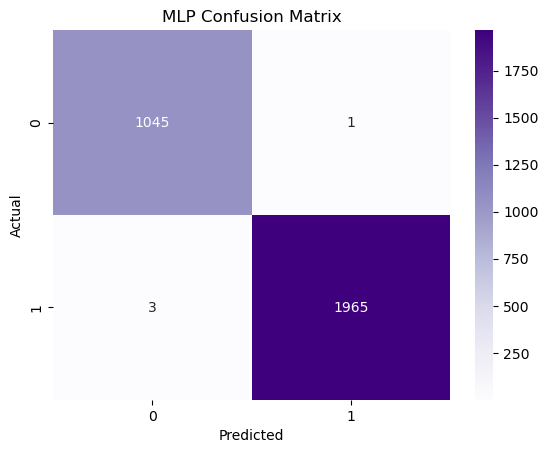

In [73]:
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt='d', cmap='Purples')
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [74]:
joblib.dump(rf, "voice_gender_classifier.pkl")


['voice_gender_classifier.pkl']

In [76]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib



# Load the scaler, model, and expected column names
scaler = joblib.load('scaler.pkl')
model = joblib.load('voice_gender_classifier.pkl')
expected_columns = joblib.load('feature_columns.pkl')

st.title("Human Voice Gender Classification")

st.write("""
Upload a CSV file containing extracted voice features or input features manually for gender prediction.
""")

# Upload CSV
uploaded_file = st.file_uploader("Choose a CSV file", type="csv")

if uploaded_file is not None:
    data = pd.read_csv(uploaded_file)
    st.write("Uploaded Data Preview:")
    st.dataframe(data.head())

    # Scale data
    data_scaled = scaler.transform(data)

    # Predict
    preds = model.predict(data_scaled)

    # Map prediction to label
    pred_labels = ['Female' if p == 0 else 'Male' for p in preds]

    st.write("Predictions:")
    st.write(pred_labels)

else:
    st.write("Or enter feature values manually:")

    # List of features you have to input (example: mean_pitch, rms_energy,...)
    features = ['mean_spectral_centroid', 'std_spectral_centroid', 'mean_spectral_bandwidth',
                'std_spectral_bandwidth', 'mean_spectral_contrast', 'mean_spectral_flatness',
                'mean_spectral_rolloff', 'zero_crossing_rate', 'rms_energy', 'mean_pitch',
                'min_pitch', 'max_pitch', 'std_pitch', 'spectral_skew', 'spectral_kurtosis',
                'energy_entropy', 'log_energy']

    user_input = []
    for feature in features:
        val = st.number_input(f"{feature}", format="%.6f")
        user_input.append(val)

    if st.button("Predict Gender"):
        input_array = np.array(user_input).reshape(1, -1)
        input_scaled = scaler.transform(input_array)
        prediction = model.predict(input_scaled)[0]
        gender = 'Female' if prediction == 0 else 'Male'
        st.success(f"Predicted Gender: {gender}")
